In [1]:
# Springboard Data Science Intensive Capstone Project

# For this story, I decided to use the dataset for my capstone project.
# This dataset was the result of combining results of different compound libraries
# I used for my Dengue virus high throughput screening. It is named DENV_HTS_data and
# is currently in a csv format and has the following layout:
#    CdId
#    MolWeight
#    MolFormula
#    LotNumber
#    DaughterPlate
#    PlateMap
#    PercentPurity
#    HCVHDAInh
#    DENVATPaseInh
#    IUPACName
#    SMILES
#    LogP
#    LogD
#    HBondDonors
#    HBondAcceptors
#    RotatableBonds
#    LipinskiRuleof5

# Initially, I wanted to create some plots that will answer the ff questions:
# 1) Since the dataset contain two columns that describe the Hepatitis C and Dengue Virus %Inhibition,
#    plot them side by side to visually see if any is more potent as an HCV inhibitor and vice versa.
# 2) Can a kdeplot give a visual presentation of how diverse the dataset is?
# 3) Does the number of rotatable bonds affect the degree of inhibition of the compound for
#    the Dengue virus?  Also, do higher number of bonds correspond to the compound passing Lipinski's Rule of 5?
# 4) What is the correlation between the number of hydrogen bond donors of a compound with its ability
#    to pass Lipinski's Rule of 5 and percent inhibition for the stopping the Dengue virus helicase activity?

# Having made these plots, I did easily notice a number of correlations:
#   1) The compounds with the lower number of rotatable bonds were more likely
#       also passed Lipinski's Rule of 5.  But this did not automatically imply
#       a higher percent inhibition of the Dengue helicase activity since one compound
#       with 2 rotatable bonds had about 58% inhibition while another with 10 rotatable 
#       bonds had about 55% inhibition.

#   2) The lower the number of hydrogen bond donors, a compound might have, the higher chance
#       it has of passing Lipinski's Rule of 5 and higher %inhibition also against the 
#       Dengue Virus helicase protein.

#   3) Most of the compounds have less than 40% inhibition for both HCV and Dengue helicase.

# Data Visualizations and Conclusion
#   Some basic plots are listed below that show the trends and correlations between molecular
# descriptors and inhibitory capability. To conclude, we learn that 1) most of the compounds in this
# assay had poor inhibition against the helicase protein of both Hepatitis C and Dengue Virus and
# 2) a lower number of hydrogen bond donors correlate with a higher inhibition rate against the DENV helicase
# but the number of rotatable bonds do not.


In [2]:
% matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# setting matplotlib style
plt.style.use('fivethirtyeight')

# loading data
data = pd.read_excel('c:/Users/Noreena/Documents/IJCProjects2/DENV_HTS/DENV_HTS_Data.xlsx', encoding='latin-1')
data.head(10)


,CdId,MolWeight,MolFormula,LotNumber,DaughterPlate,PlateMap,PercentPurity,HCVHDAInh,DENVATPaseInh,IUPACName,SMILES,LogP,LogD,HBondDonors,HBondAcceptors,RotatableBonds,LipinskiRuleof5
0,1,395.60,C25H33NOS,PSL-8-168-K2A4T,KUP100787,A03,100.00,-0.66,-5.87,(5R)-5-tert-butyl-1-[(3S)-3-phenyl-3-(phenylsu...,CC(C)(C)[C@H]1CCN(CC[C@H](Sc2ccccc2)c2ccccc2)C...,5.92,5.92,0,1,7,False
1,2,568.71,C32H28N2O4S2,CMC-32-2-A16,KUP100787,A04,92.41,-5.61,-12.12,"(2R,4R)-3-(benzenesulfonyl)-4-ethenyl-6-methyl...",Cc1ccc(cc1)S(=O)(=O)N1[C@H](c2ccccc2)C(C#N)([C...,6.96,6.96,0,5,5,False
2,3,298.40,C14H22N2O3S,CL-COB1-35-a,KUP100787,A05,100.00,-7.59,-5.91,"propyl (6R,7R)-3-methyl-8-oxo-7-(propylamino)-...",CCCN[C@H]1[C@H]2SCC(C)=C(N2C1=O)C(=O)OCCC,1.86,1.24,1,3,7,True
3,4,410.33,C18H20BrNO3S,PRH-AZ-059,KUP100787,A06,99.17,-3.63,-6.93,N-[(2-bromophenyl)methyl]-N-[(2S)-1-hydroxy-3-...,OC[C@H](Cc1ccccc1)N(Cc1ccccc1Br)S(=O)(=O)C=C,3.52,3.52,1,3,7,True
4,5,407.45,C18H24F3NO4S,PSL4-1-340-10,KUP100787,A07,99.00,-8.58,-11.89,"2-[(3S)-2-octyl-1,1-dioxo-6-(trifluoromethyl)-...",CCCCCCCCN1[C@@H](CC(O)=O)c2ccc(cc2S1(=O)=O)C(F...,4.53,1.32,1,4,10,True
5,6,440.53,C28H28N2O3,CMC-33-121,KUP100787,A08,98.70,-3.63,-1.87,"ethyl (6aR,11aS)-6-benzyl-9-(dimethylamino)-5-...",[H][C@]12N(Cc3ccccc3)C(=O)c3ccccc3[C@]1(Cc1cc(...,4.97,4.97,0,3,6,True
6,7,515.56,C28H22FN3O4S,CMC-32-2-A21,KUP100787,A09,99.44,-4.62,-1.41,"methyl 4-[(2R,4S)-3,3-dicyano-4-ethenyl-5-fluo...",COC(=O)c1ccc(cc1)[C@H]1N(c2cccc(F)c2[C@@H](C=C...,5.28,5.28,0,5,5,False
7,8,426.55,C25H34N2O4,CMC-1-281-1A6,KUP100787,A10,100.00,-9.57,2.87,"(4aS,8R,8aS)-N-cyclohexyl-2-[(3,4-dimethoxyphe...",[H][C@@]12CCN(Cc3ccc(OC)c(OC)c3)C(=O)[C@]1([H]...,2.83,2.83,1,4,6,True
8,9,377.38,C16H18F3NO4S,PSL4-1-338-5,KUP100787,A11,94.60,-10.56,-8.05,"2-[(3S)-2-cyclohexyl-1,1-dioxo-5-(trifluoromet...",OC(=O)C[C@@H]1N(C2CCCCC2)S(=O)(=O)c2ccc(cc12)C...,3.23,0.04,1,4,4,True
9,10,507.53,C27H20F3N3O2S,CMC-32-2-A8,KUP100787,A12,98.90,-11.55,-8.05,"(2R,4R)-4-ethenyl-1-(4-methylbenzenesulfonyl)-...",Cc1ccc(cc1)S(=O)(=O)N1[C@H](c2ccccc2C(F)(F)F)C...,6.01,6.01,0,4,4,False


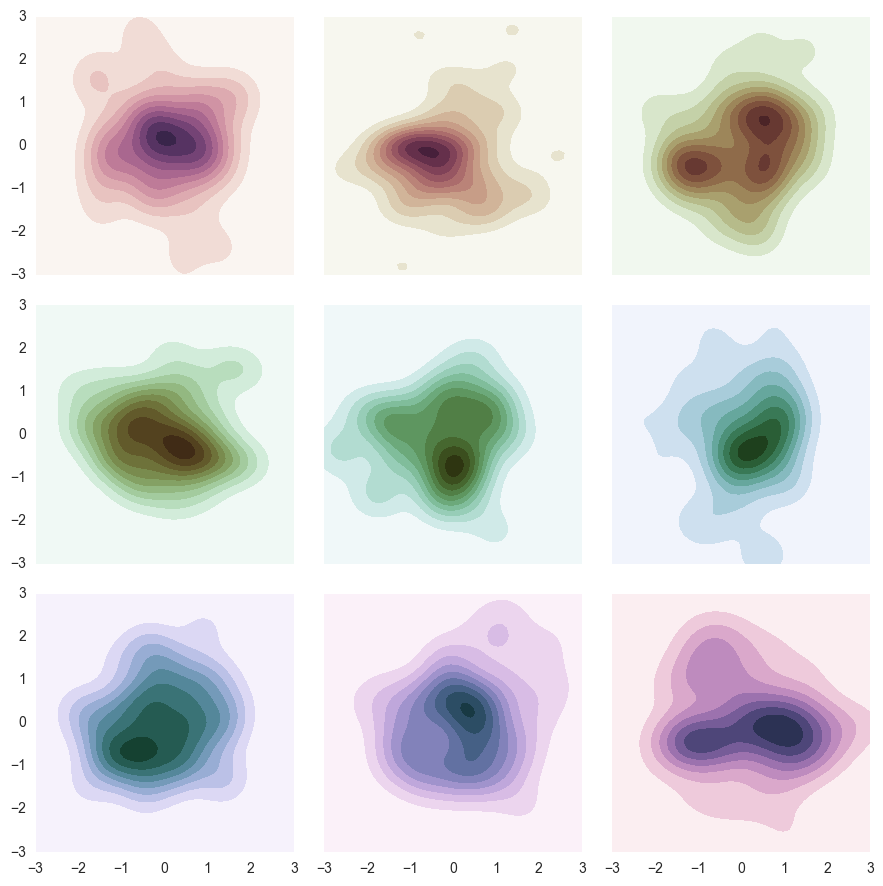

In [3]:
# In the next few cells, I'd like to visualize the data by using some
# standard 1D and 2D graphs.

# For now, plot a kernel density estimate

% matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# setting matplotlib style
plt.style.use('fivethirtyeight')

# loading data
data = pd.read_csv('c:/Users/Noreena/Documents/IJCProjects2/DENV_HTS/DENV_HTS_Data.csv', encoding='latin-1')

# seaborn kdeplot
sns.set(style="dark")
rs = np.random.RandomState(50)

# Set up the matplotlib figure
f, axes = plt.subplots(3, 3, figsize=(9, 9), sharex=True, sharey=True)

# Rotate the starting point around the cubehelix hue circle
for ax, s in zip(axes.flat, np.linspace(0, 3, 10)):

    # Create a cubehelix colormap to use with kdeplot
    cmap = sns.cubehelix_palette(start=s, light=1, as_cmap=True)

    # Generate and plot a random bivariate dataset
    x, y = rs.randn(2, 50)
    sns.kdeplot(x, y, cmap=cmap, shade=True, cut=5, ax=ax)
    ax.set(xlim=(-3, 3), ylim=(-3, 3))

f.tight_layout()




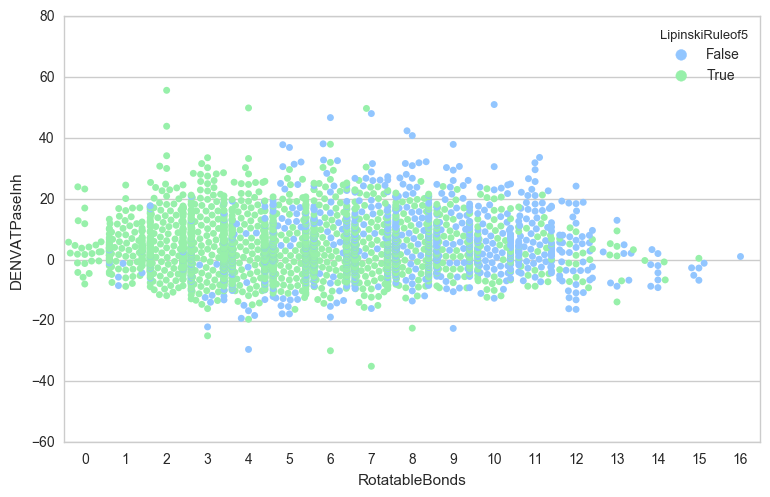

In [4]:
% matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

sns.set(style="whitegrid", palette="pastel", color_codes=True)

# loading data
dataHTS = pd.read_csv('c:/Users/Noreena/Documents/IJCProjects2/DENV_HTS/DENV_HTS_Data.csv', encoding='latin-1')

# "Melt" the dataset to "long-form" or "tidy" representation
DENV = pd.melt(dataHTS, "RotatableBonds", var_name="LipinskiRuleof5")

# Draw a categorical scatterplot to show each observation
sns.swarmplot(x="RotatableBonds", y="DENVATPaseInh", hue="LipinskiRuleof5", data=dataHTS)

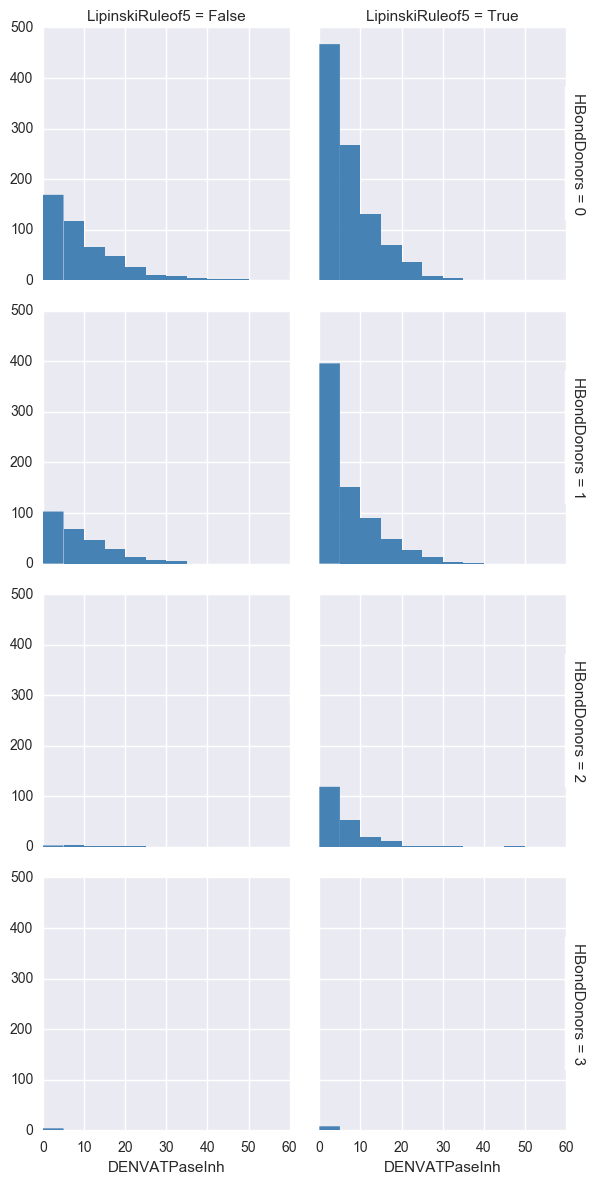

In [5]:
# Next, create a facet grid

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="darkgrid")

# loading data
dataHTS = pd.read_csv('c:/Users/Noreena/Documents/IJCProjects2/DENV_HTS/DENV_HTS_Data.csv', encoding='latin-1')  

g = sns.FacetGrid(dataHTS, row="HBondDonors", col="LipinskiRuleof5", margin_titles=True)
bins = np.linspace(0, 60, 13)
g.map(plt.hist, "DENVATPaseInh", color="steelblue", bins=bins, lw=0)

C:\Users\Noreena\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


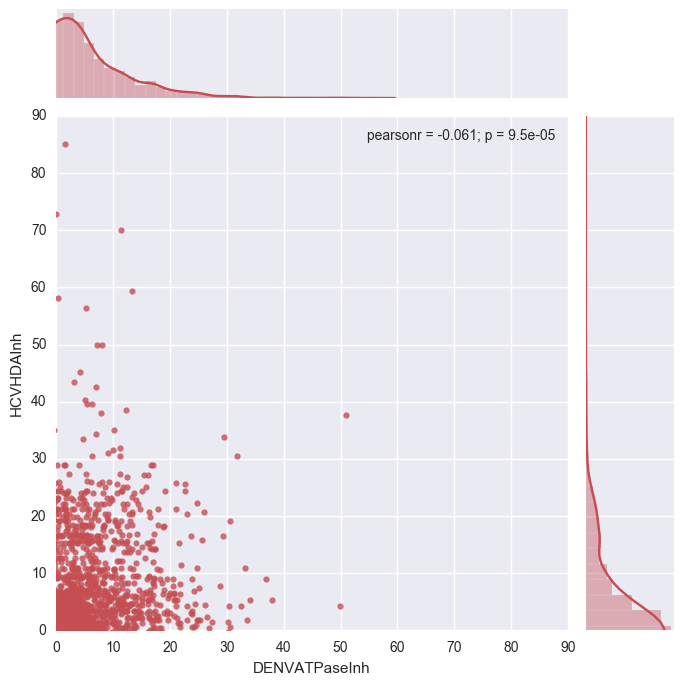

In [6]:
# Next, create a jointplot

import seaborn as sns
sns.set(style="darkgrid", color_codes=True)

# loading data
dataHTS = pd.read_csv('c:/Users/Noreena/Documents/IJCProjects2/DENV_HTS/DENV_HTS_Data.csv', encoding='latin-1') 

g = sns.jointplot("DENVATPaseInh", "HCVHDAInh", data=dataHTS, kind="reg",
                  xlim=(0, 90), ylim=(0, 90), color="r", size=7)

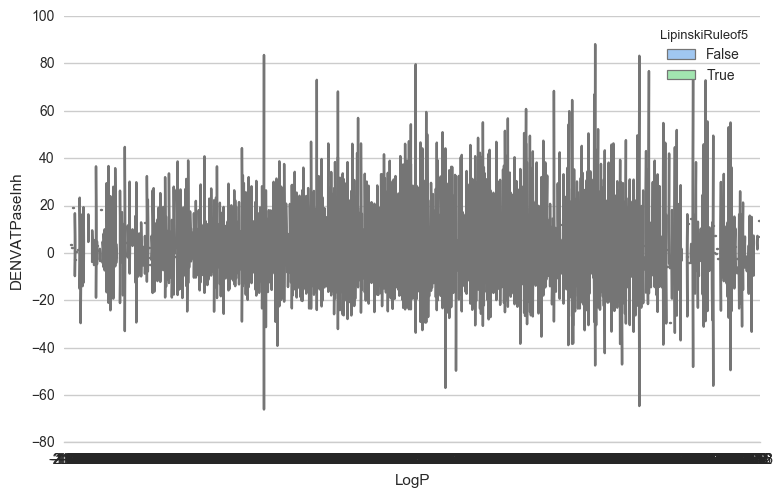

In [7]:
# Visualize the data with a violin plot.

import seaborn as sns
sns.set(style="whitegrid", palette="pastel", color_codes=True)

# Load the data
dataHTS = pd.read_csv('c:/Users/Noreena/Documents/IJCProjects2/DENV_HTS/DENV_HTS_Data.csv', encoding='latin-1')

# "Melt" the dataset to "long-form" or "tidy" representation
#DENV = pd.melt(dataHTS, "RotatableBonds", var_name="LipinskiRuleof5")

# Draw a nested violinplot and split the violins for easier comparison
sns.violinplot(x="LogP", y="DENVATPaseInh", hue="LipinskiRuleof5", data=dataHTS, split=True,
               inner="quart")
#sns.violinplot(x="LogP", y="DENVATPaseInh", hue="LipinskiRuleof5", data=dataHTS, split=True,
#               inner="quart", palette={"True": "b", "False": "y"})
sns.despine(left=True)

In [8]:
# Linear Regression
# Y=Dengue Virus ATPase Percent Inhibition (called "target" data in python, and referred to as
# the dependent variable or response variable)
# and X= all the other features (or independent variables, predictors or explanatory variables)
# which we will use to fit a linear regression model and predict Boston housing prices. We will 
# use the least-squares method to estimate the coefficients.

# Import regression modules
import statsmodels.api as sm
from statsmodels.formula.api import ols

# statsmodels works nicely with pandas dataframes
# The thing inside the "quotes" is called a formula, a bit on that below
m = ols('DENVATPaseInh ~ LogP + LogD + HBondDonors + HBondAcceptors + RotatableBonds', dataHTS).fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:          DENVATPaseInh   R-squared:                       0.026
Model:                            OLS   Adj. R-squared:                  0.025
Method:                 Least Squares   F-statistic:                     21.54
Date:                Wed, 22 Mar 2017   Prob (F-statistic):           2.41e-21
Time:                        14:59:41   Log-Likelihood:                -14413.
No. Observations:                4078   AIC:                         2.884e+04
Df Residuals:                    4072   BIC:                         2.888e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
Intercept         -0.5249      0.520     -1.

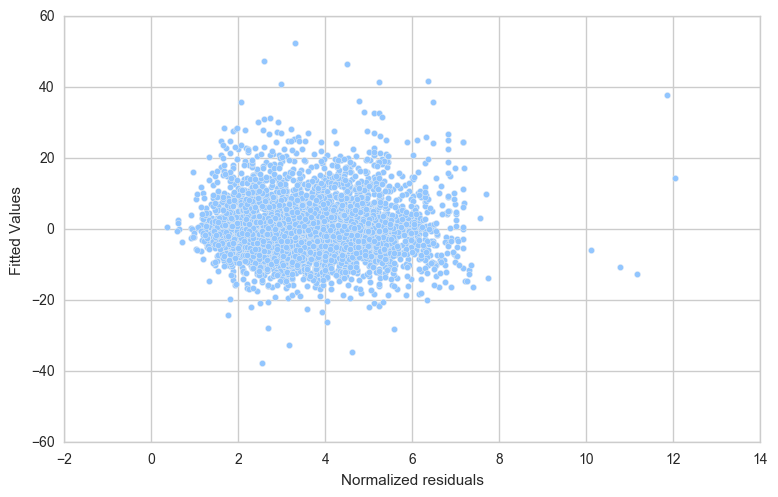

In [9]:
# Create a scatter plot of fitted values versus residuals
plt.scatter(m.fittedvalues, m.resid)
plt.ylabel("Fitted Values")
plt.xlabel("Normalized residuals")

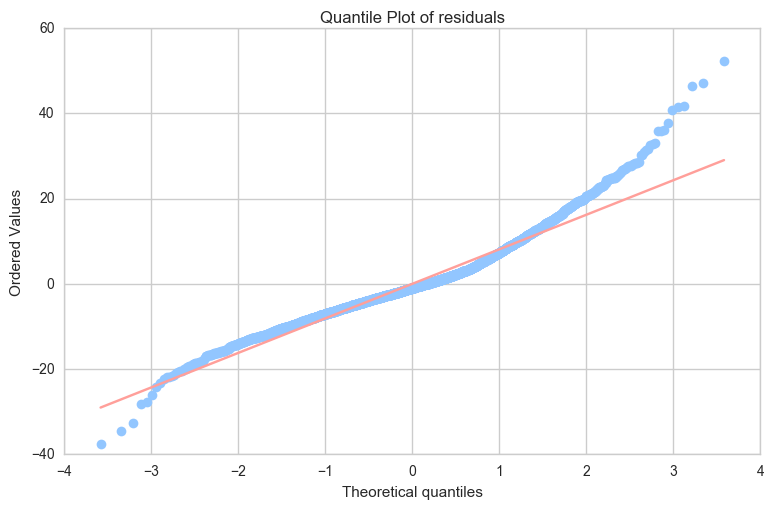

In [10]:
# Construct a quantile plot of the residuals.
from scipy import stats
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111)
res = stats.probplot(m.resid, dist="norm", plot=ax)
ax.set_title("Quantile Plot of residuals")
plt.show()

In [11]:
from sklearn.cluster import KMeans
import numpy as np

# Create a data frame where each row has a customer_name column and one column
# for each offer, with a 1 if the customer responded to the offer.
# Use pandas merge and pivot table functions for this purpose.
dataHTS_truncated = dataHTS.drop(dataHTS.columns[[0,1,2,3,4,5,6,9,10]], axis=1)

dataHTS_cols = np.matrix(dataHTS_truncated)


Automatically created module for IPython interactive environment
For n_clusters = 2 The average silhouette_score is : 0.290690017507


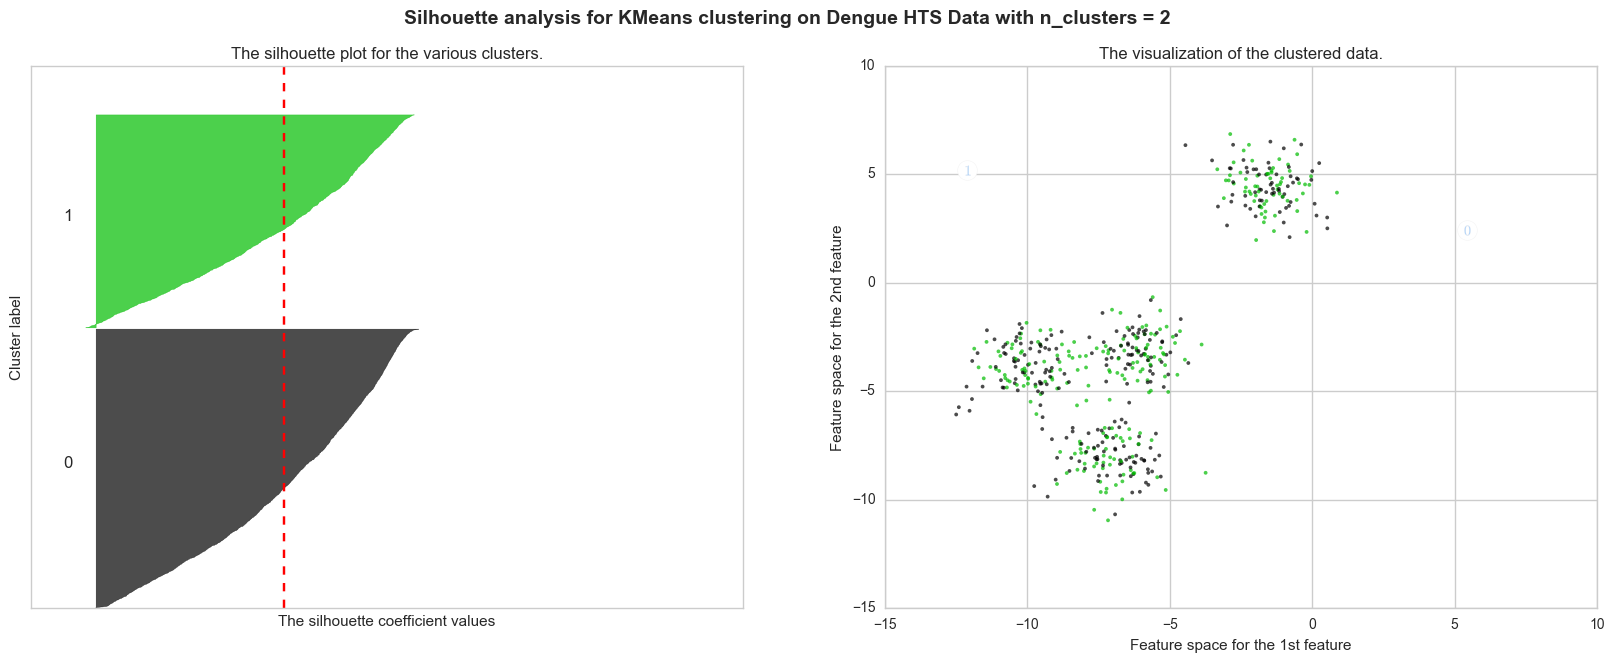

For n_clusters = 3 The average silhouette_score is : 0.319996598223


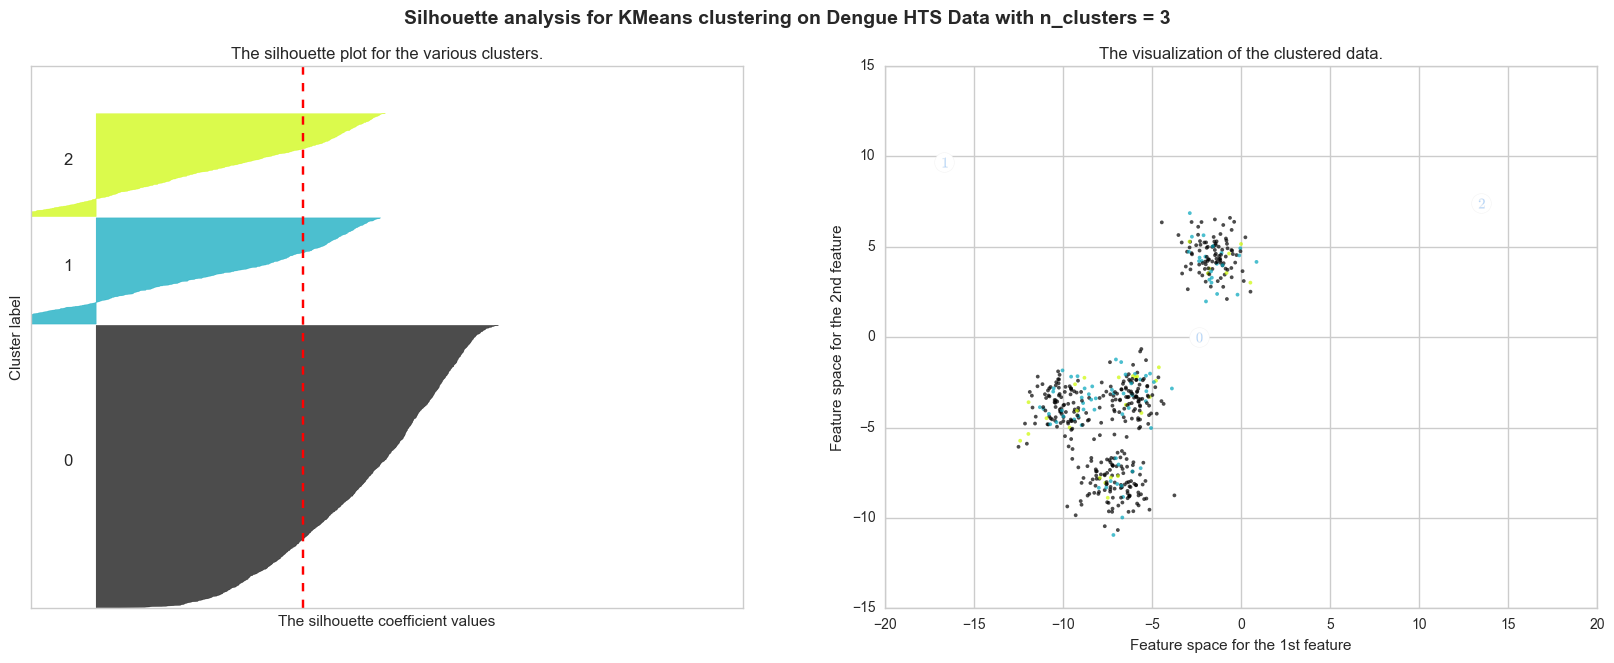

For n_clusters = 4 The average silhouette_score is : 0.341032051397


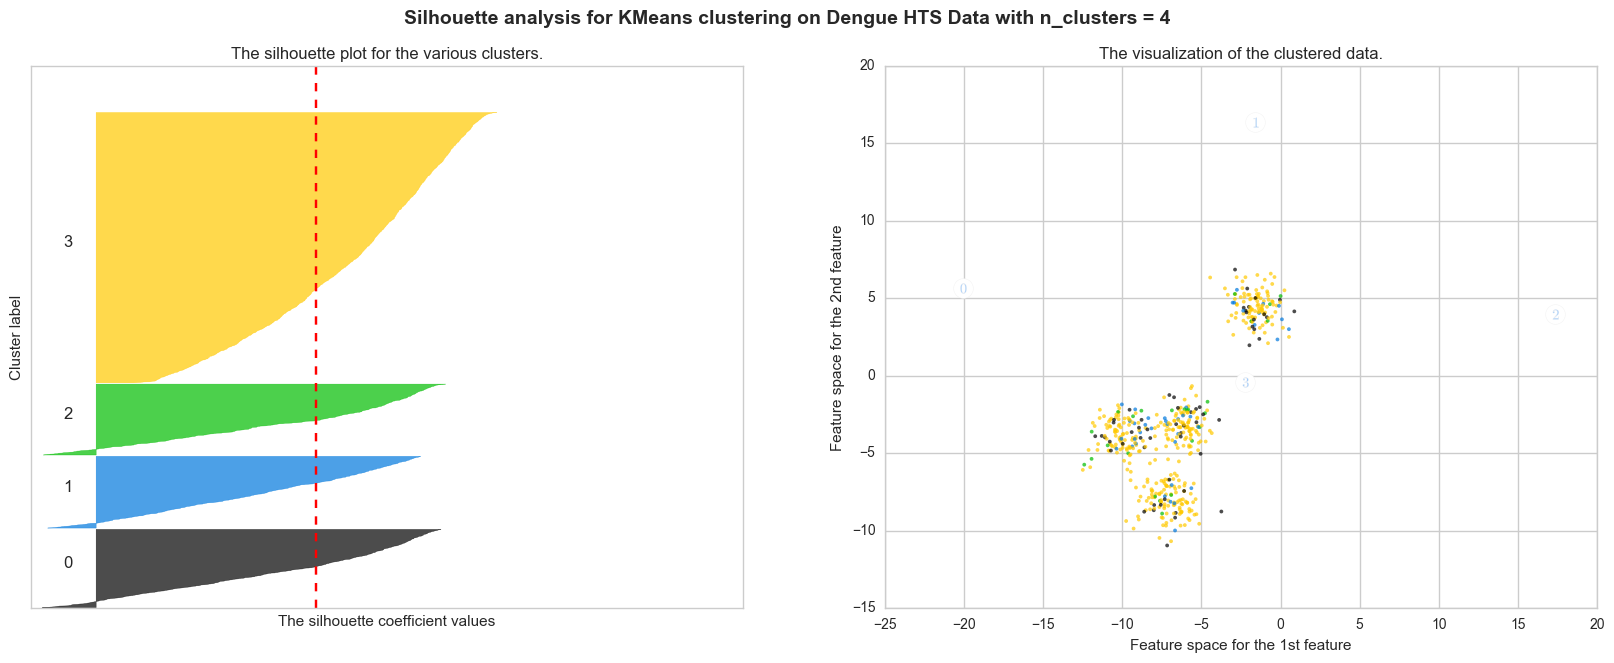

For n_clusters = 5 The average silhouette_score is : 0.275191756712


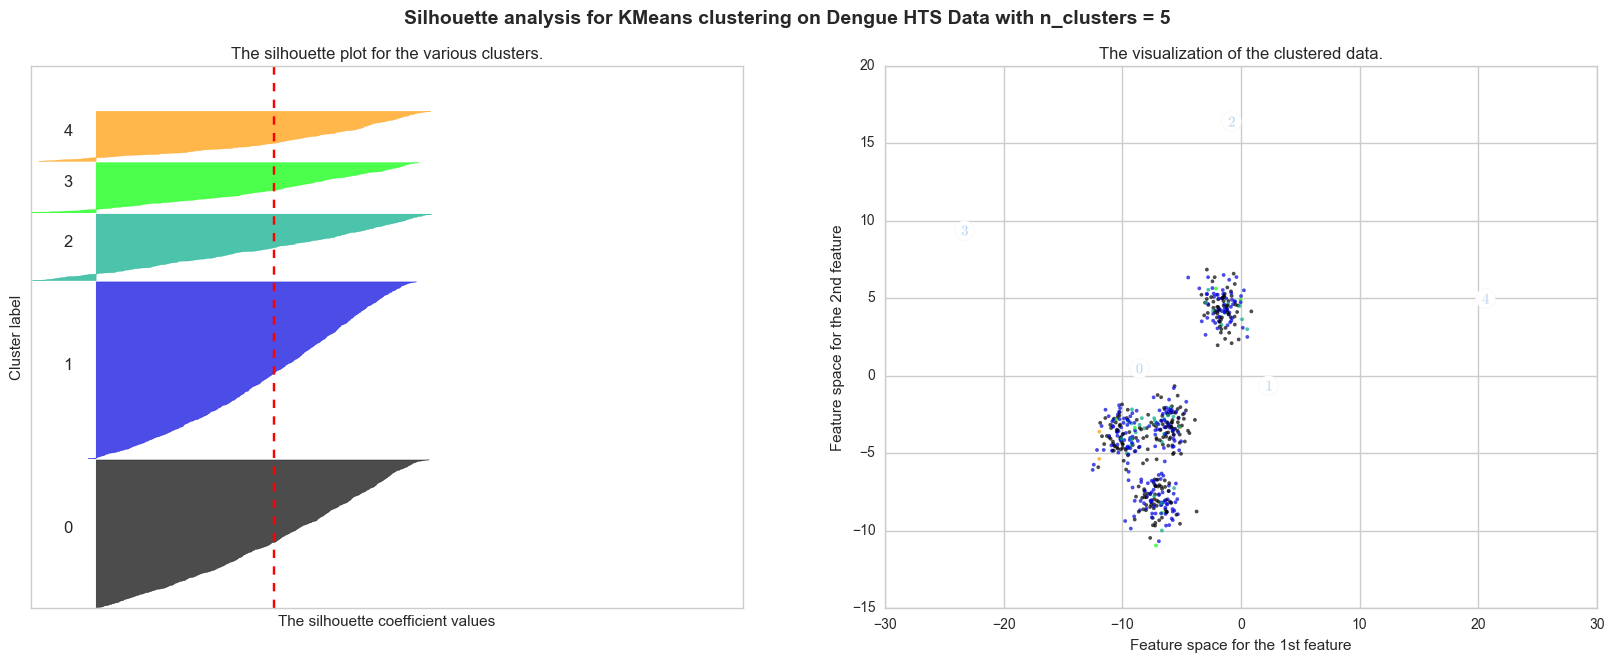

For n_clusters = 6 The average silhouette_score is : 0.253901302478


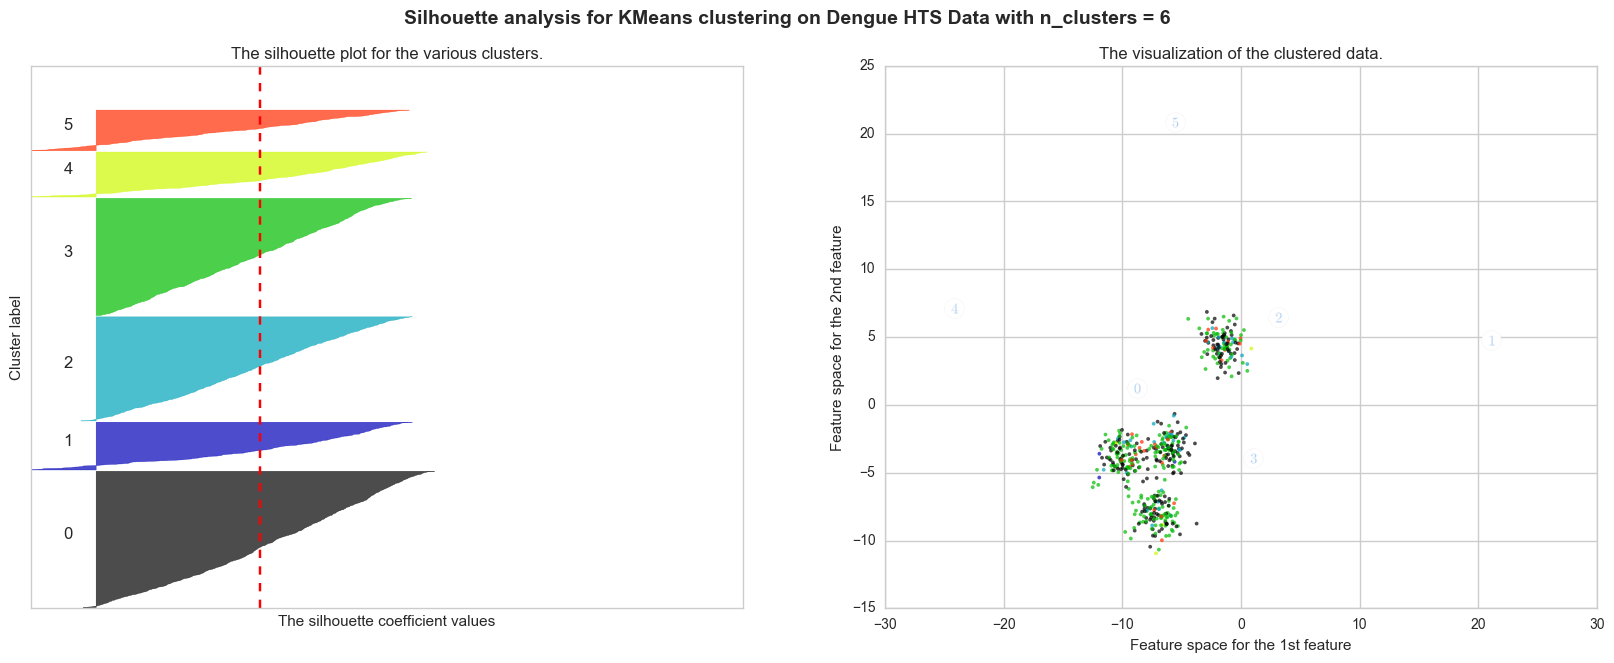

For n_clusters = 7 The average silhouette_score is : 0.246947413272


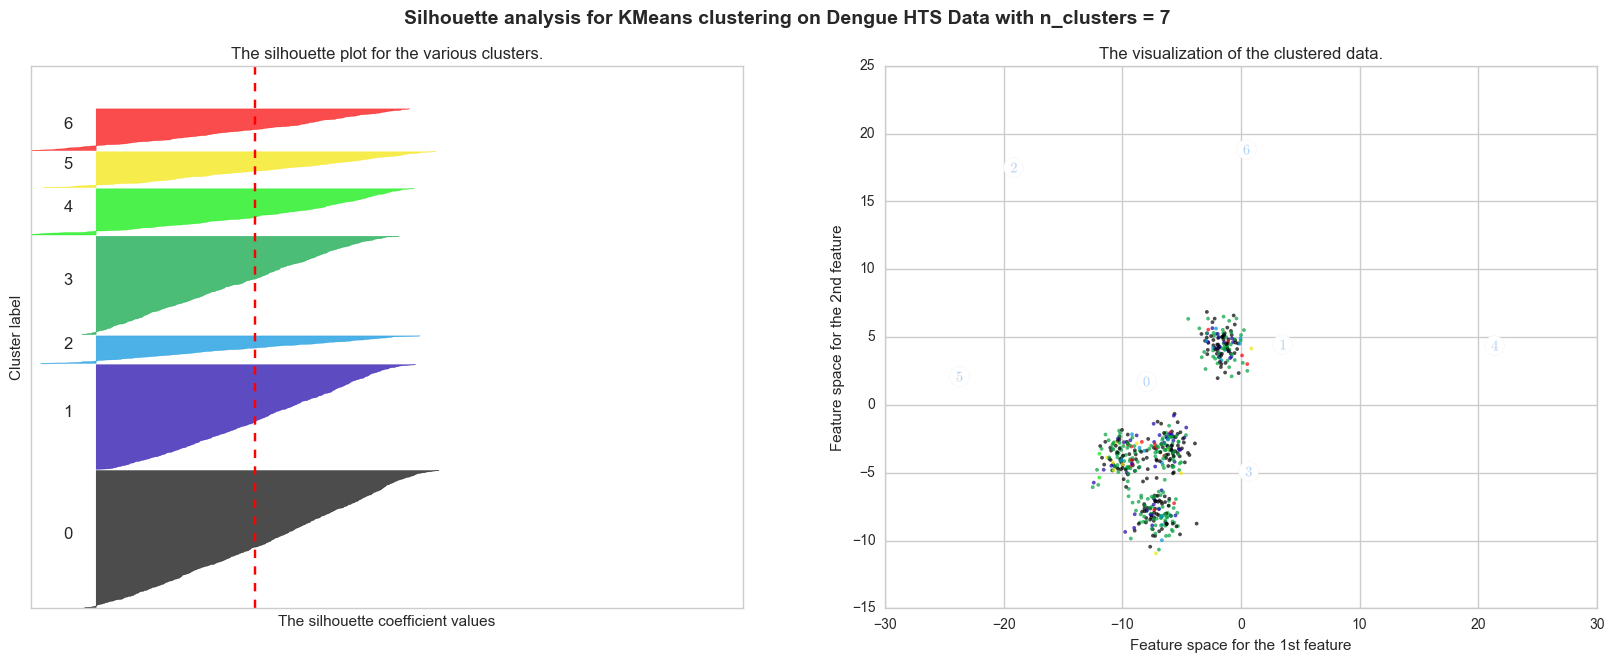

For n_clusters = 8 The average silhouette_score is : 0.238952581673


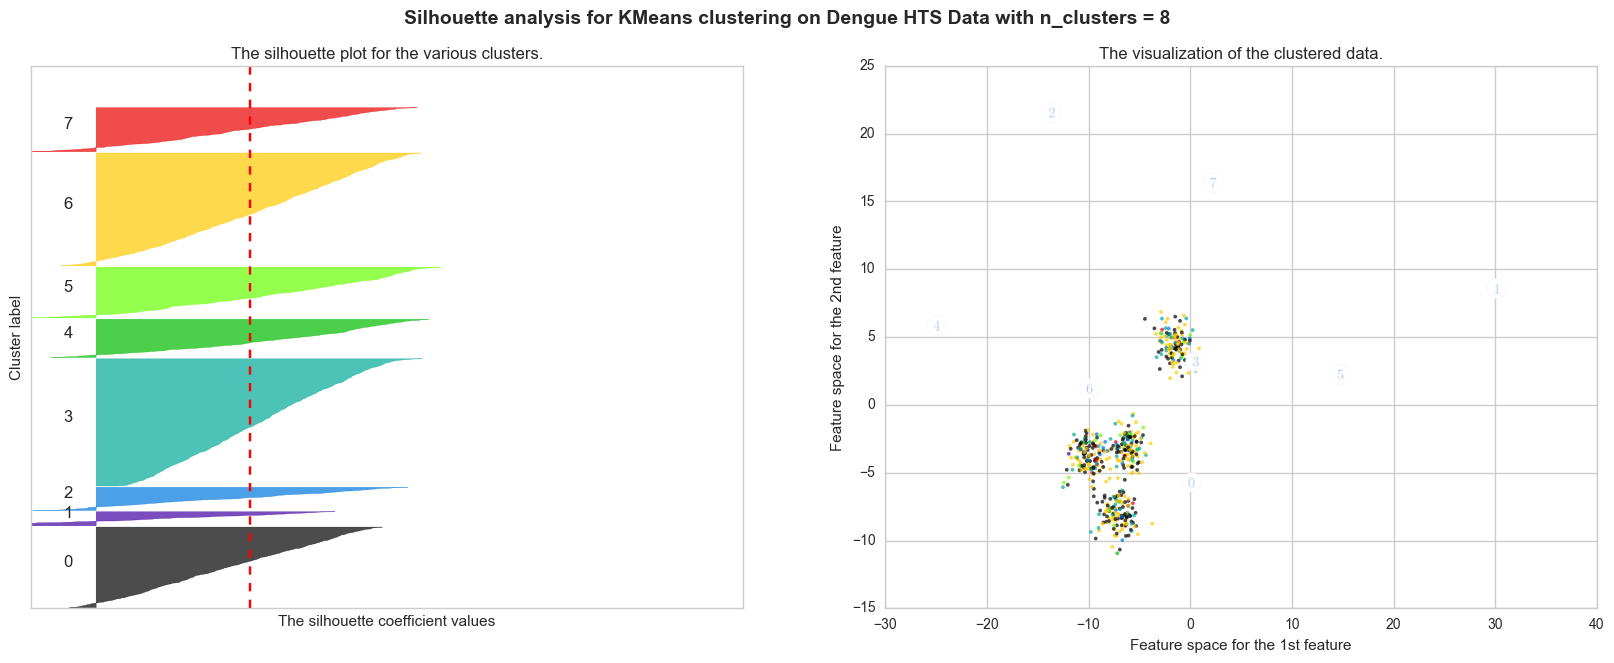

For n_clusters = 9 The average silhouette_score is : 0.229496937565


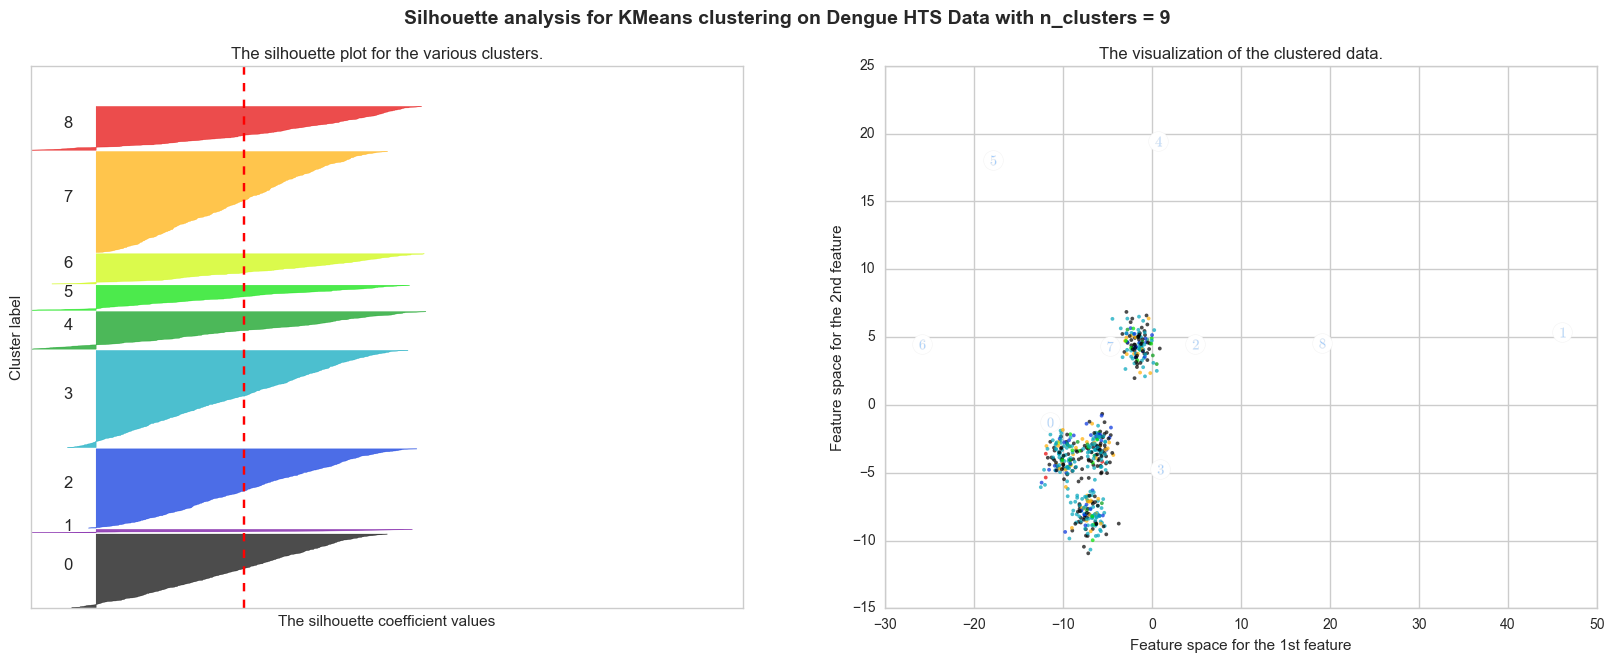

In [12]:
# Using silhoutte_score function laid out in scikit-learn,
# construct a series of silhouetter plots like the ones in the
# article linked above. By doing silhouette analysis, we can
# study the separation distance between the resulting clusters.

from __future__ import print_function

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.cm as cm
import numpy as np

print(__doc__)

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
X, y = make_blobs(n_samples=500,
                  n_features=2,
                  centers=4,
                  cluster_std=1,
                  center_box=(-10.0, 10.0),
                  shuffle=True,
                  random_state=1)  # For reproducibility

range_n_clusters = range(2, 10)

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns.
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot.
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.2, 0.5]
    ax1.set_xlim([-0.1, 1.0])
    
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    # ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(dataHTS_cols)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(dataHTS_cols, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(dataHTS_cols, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([])
    
    # 2nd Plot show the actual clusters formed
    colors = cm.spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors)

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1],
                marker='o', c="white", alpha=1, s=200)

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50)

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")


    plt.suptitle(("Silhouette analysis for KMeans clustering on Dengue HTS Data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show()

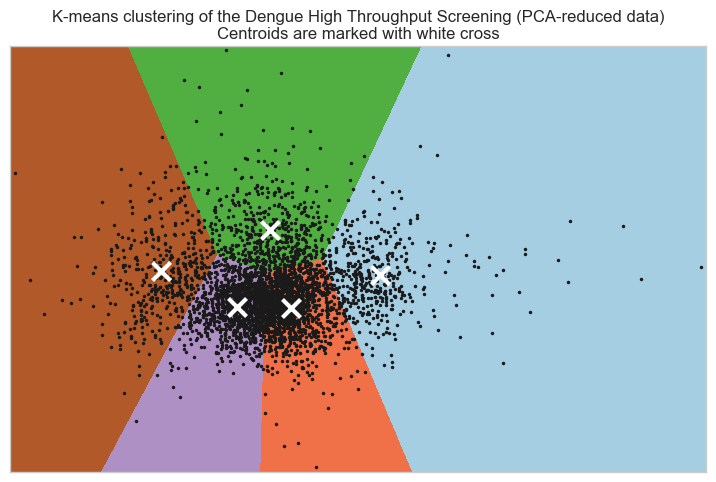

In [13]:
# Use scikit-learn's PCA function to reduce the dimensionality of 
# your clustering data to 2 components.  

# Plot the PCA results showing the centroids, this is
# patterned from an example ny scikit-learn

import numpy as np
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

PCA2comp = PCA(n_components=2).fit_transform(dataHTS_cols)
kmeans = KMeans(n_clusters=5, n_init=100)
kmeans.fit(PCA2comp)

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .02     # point in the mesh [x_min, m_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = PCA2comp[:, 0].min() - 1, PCA2comp[:, 0].max() + 1
y_min, y_max = PCA2comp[:, 1].min() - 1, PCA2comp[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
df_PCA = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
df_PCA = df_PCA.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(df_PCA, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(PCA2comp[:, 0], PCA2comp[:, 1], 'k.', markersize=5)

# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('K-means clustering of the Dengue High Throughput Screening (PCA-reduced data)\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

In [20]:
# Decision Tree Classifier

% matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import numpy as np
import pandas as pd
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split,  cross_val_score
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.grid_search import GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.externals import joblib
    
# Load data
data = pd.read_excel('c:/Users/Noreena/Documents/IJCProjects2/DENV_HTS/DENV_HTS_Data.xlsx', encoding='latin-1')
data.drop(['MolWeight','MolFormula','LotNumber','DaughterPlate','PlateMap','PercentPurity','IUPACName','SMILES','LipinskiRuleof5'], axis=1, inplace=True)
data.head(10)
        
# checking data types
data.dtypes

# Let's define our X and y data
y = data.DENVATPaseInh.values.astype(np.int)
X = data

# checking to see that none of the data points were lost
print("n: ", len(y))
print("features: ", len(data.columns))

import numpy as np
from sklearn.cross_validation import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

classifier = MultinomialNB()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=40)

X_train.apply(pd.to_numeric, errors='ignore').info()

X_train.dtypes

tree_params = {'min_samples_split': [4, 8, 16], 
               'min_samples_leaf': [2, 4, 8]}

dtc = GridSearchCV(DecisionTreeClassifier(class_weight='balanced'), tree_params, cv=5)

dtc.fit(X_train, y_train)

n:  4078
features:  8
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2732 entries, 2924 to 3398
Data columns (total 8 columns):
CdId              2732 non-null int64
HCVHDAInh         2732 non-null float64
DENVATPaseInh     2732 non-null float64
LogP              2732 non-null float64
LogD              2732 non-null float64
HBondDonors       2732 non-null int64
HBondAcceptors    2732 non-null int64
RotatableBonds    2732 non-null int64
dtypes: float64(4), int64(4)
memory usage: 192.1 KB


C:\Users\Noreena\Anaconda3\lib\site-packages\sklearn\cross_validation.py:552: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of labels for any class cannot be less than n_folds=5.
  % (min_labels, self.n_folds)), Warning)


GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight='balanced', criterion='gini',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'min_samples_split': [4, 8, 16], 'min_samples_leaf': [2, 4, 8]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [15]:
dtc.best_params_

{'min_samples_leaf': 2, 'min_samples_split': 8}

In [16]:
print("Acc: ", dtc.score(X_test, y_test))


Acc:  0.991084695394


In [17]:
dtc.predict_proba(X_test)

# evaluating the model using 10-fold cross-validation
tree_scores = cross_val_score(dtc.best_estimator_, X, y, scoring='accuracy', cv=10)
print(tree_scores)
print(tree_scores.mean())

C:\Users\Noreena\Anaconda3\lib\site-packages\sklearn\cross_validation.py:552: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of labels for any class cannot be less than n_folds=10.
  % (min_labels, self.n_folds)), Warning)


[ 0.96213808  0.97916667  0.98812352  0.98792271  0.99509804  0.995
  0.97974684  0.99485861  0.99740933  0.99739583]
0.987685961829


In [18]:
# Random Forest Classifier
forest_params = {'oob_score': [True, False], 
                 'min_samples_split': [8, 16], 
                 'min_samples_leaf': [4, 8]}
rfc = GridSearchCV(RandomForestClassifier(), forest_params, cv=5)
rfc.fit(X_train, y_train)

C:\Users\Noreena\Anaconda3\lib\site-packages\sklearn\cross_validation.py:552: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of labels for any class cannot be less than n_folds=5.
  % (min_labels, self.n_folds)), Warning)
C:\Users\Noreena\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Noreena\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Noreena\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("S

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'oob_score': [True, False], 'min_samples_split': [8, 16], 'min_samples_leaf': [4, 8]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [19]:
print("Acc: ", rfc.score(X_test, y_test))


Acc:  0.687221396731
